## Gráficas para el artículo

## Bibliotecas

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from sqlalchemy.engine.url import URL
import sqlalchemy as sa


## Coneción a la base de datos.

In [2]:

connection_string = (
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    r"DBQ=C:\\Users\\User\\OneDrive\\Investigaciones\\Doctorado\\Revisionsistemática\\Revisionusandostaroffice\\Revisiones_literatura-DESKTOP-92GM44S.accdb;"
    r"ExtendedAnsiSQL=1;"
)
connection_url = sa.engine.URL.create(
    "access+pyodbc",
    query={"odbc_connect": connection_string}
)
engine = sa.create_engine(connection_url)

def BarChart(x,y,title,xlabel, ylabel):
    fig, ax = plt.subplots()
    g=ax.bar(x, y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.bar_label(g, label_type='edge')
    plt.show()



with engine.connect() as con:
    query = text("select Anio, CuentaDeAnio from ArticuloIncluidosPorAnio")
    df = pd.read_sql_query(query, con)
    print("total articulos:"+str(df['CuentaDeAnio'].sum()))
    print(df)


total articulos:121
   Anio  CuentaDeAnio
0  2017             1
1  2018            15
2  2019            21
3  2020            19
4  2021            27
5  2022            32
6  2023             6


## Gráficando la consulta

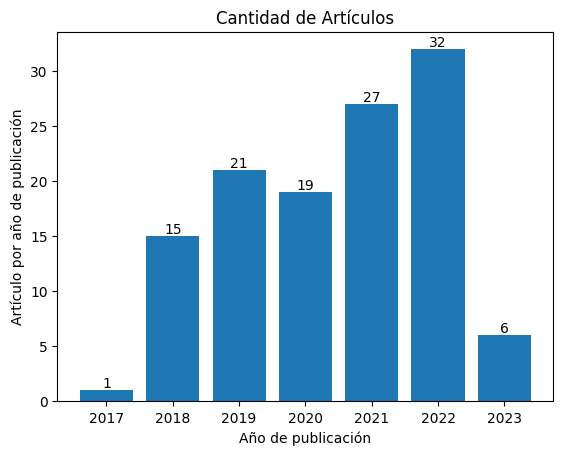

In [3]:
BarChart(df['Anio'], df['CuentaDeAnio'],'Cantidad de Artículos','Año de publicación','Artículo por año de publicación')


## Ubicación de las revistas según Scimago Journal & Country Rango(SJR)

   cantidad Cuartil
0        41      Q1
1        13      Q2
2        12      Q3
3         3      Q4


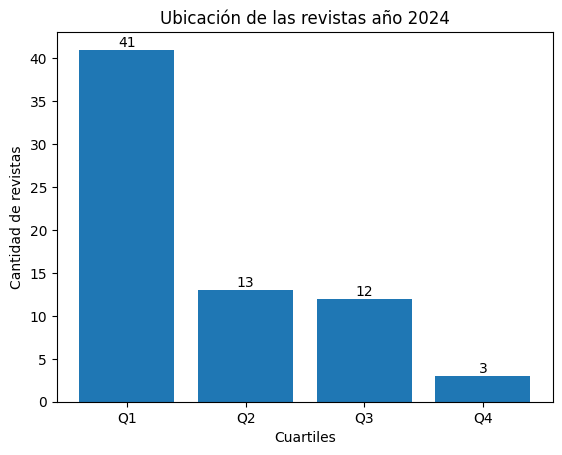

In [4]:
with engine.connect() as con:
    query = text("select * from MagazineBySJR")
    df = pd.read_sql_query(query, con)
    print(df)

BarChart(df['Cuartil'], df['cantidad'],'Ubicación de las revistas año 2024','Cuartiles','Cantidad de revistas')


In [5]:
with engine.connect() as con:
    query = text("select * from ArticulosPorTipoArticulo")
    df = pd.read_sql_query(query, con)
    total = df['cantidad'].sum()
    df['Porcentaje'] = (df['cantidad'] / total) * 100
    print(df)
    print("Total articulos:"+str(total))

   cantidad nombre_tipo  Porcentaje
0       117    Artículo   96.694215
1         4    Revisión    3.305785
Total articulos:121


In [6]:
with engine.connect() as con:
    query = text("select DOI as DOI from Articulo WHERE Anio='2022' and incluidoPaper=True")
    df = pd.read_sql_query(query, con)         
    df.index = df.index+10 
    print(df)

                              DOI
10      10.1108/JHTT-04-2021-0120
11      10.46754/jssm.2022.09.008
12  10.1016/j.tourman.2022.104516
13  10.1016/j.tourman.2022.104513
14  10.1016/j.tourman.2021.104469
15             10.3390/su14148728
16             10.1111/tgis.12929
17        10.1108/TR-07-2019-0286
18     10.1016/j.jhtm.2022.02.031
19  10.1080/13683500.2021.1970117
20     10.1007/s40558-022-00229-6
21         10.3390/ijerph19095639
22    10.18306/dlkxjz.2022.03.014
23    10.1109/ACCESS.2022.3155171
24     10.1016/j.jdmm.2022.100689
25             10.3390/su14074352
26  10.1080/1743873X.2021.1951277
27           10.3390/info13020070
28    10.18306/dlkxjz.2022.03.013
29         10.30892/gtg.40115-811
30   10.1371/journal.pone.0270531
31  10.1080/15481603.2022.2051382
32             10.1111/tgis.12998
33           10.1553/moegg163s371
34  10.1080/09654313.2022.2045571
35       10.18666/JPRA-2021-11113
36  10.1080/23750472.2020.1829987
37             10.1111/tgis.12903
38      10.110

In [7]:
with open("texto.txt", "r", encoding="utf-8") as f:
       content = f.read() 
       f.close()      

for index, value in df['DOI'].items():
        if content.find(value) ==-1:
              print(index, value)
        

## Tokenizer a text

In [9]:
with engine.connect() as con:
    query = text("select cantidad, round((cantidad /121) *100,0) as Porcentaje, concepto from  (seLECT count(Articulo.id) as cantidad,Articulo_pregunta.Concepto " +
                  "FROM Articulo INNER JOIN Articulo_pregunta ON Articulo.Id = Articulo_pregunta.Id_articulo " +  
                 " WHERE (Articulo.IncluidoPaper=True and  Articulo_pregunta.id_pregunta=1 ) group by Articulo_pregunta.Concepto );" )
    df = pd.read_sql_query(query, con)
    print(df)
    con.close()

"""
texto = "Este es un ejemplo de texto.  Podemos tokenizar este texto en oraciones y palabras."
palabras = nltk.word_tokenize(texto)
print("Palabras:", palabras)
"""

   cantidad  Porcentaje                concepto
0        35        29.0                    Guía
1        41        34.0  Herramienta conceptual
2        15        12.0             Metodología
3        21        17.0      Modelo de solución
4         9         7.0  Sistema de Información


'\ntexto = "Este es un ejemplo de texto.  Podemos tokenizar este texto en oraciones y palabras."\npalabras = nltk.word_tokenize(texto)\nprint("Palabras:", palabras)\n'

## Generación de nubes de Palabras y Archivo de frecuencia de Términos

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Numbes de palabras por título


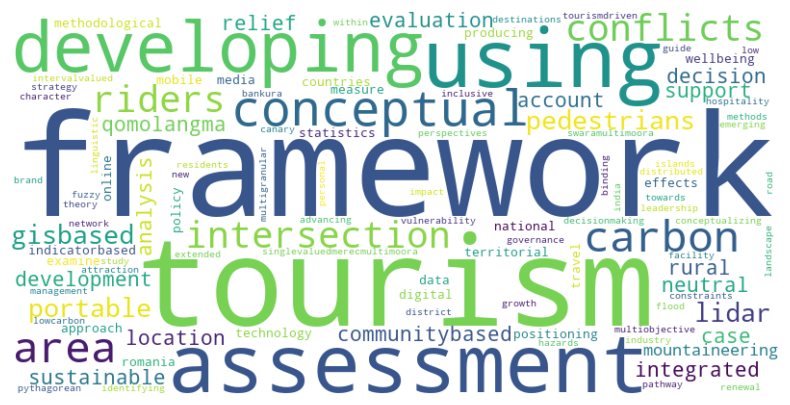

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string 
import re
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import csv 
import xlsxwriter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('stopwords')

def remove_punctuationAndDigit(text):
  """Removes punctuation from a string using regular expressions."""
  # Create a regex pattern that matches any punctuation character
  pattern = r'[' + re.escape(string.punctuation) + r']'
  # Substitute all matches with an empty string
  textWihoutPuntuation = re.sub(pattern, '', text)
  textCleaned= re.sub(r'd\+','',textWihoutPuntuation)  
  return textCleaned


def cleanText(textList,Language):   
   
    text =[w for w in textList if w is not None]
    textToLowerCase = [w.lower() for w in text] 
    textWitoutSpace = [w.strip() for w in textToLowerCase] 
    text = " ".join(textWitoutSpace)  
    textCleaned = remove_punctuationAndDigit(text) 
    
    stop_words=set(stopwords.words(Language))
    
    tokens= nltk.word_tokenize(textCleaned)
    
    
    filtered_text = [w for w in tokens  if w not in stop_words]
    text = ' '.join(filtered_text)
    return text,filtered_text
    
    

def MatrixTer_Document(document):
    vectorizer = CountVectorizer()
    tdm=vectorizer.fit_transform(document)
    return tdm

def countTerm(listWord):
    frequency = nltk.FreqDist(listWord)
    return frequency.values()

def WriteCSVWordAndFrec(listWord):
    with open('frecuenciaPalabras.csv', 'w', newline='',encoding="utf-8") as csvfile:
        frequency = countTerm(listWord) 
        spamwriter = csv.writer(csvfile,delimiter=',')
        for w, f in zip(listWord,frequency):                       
             spamwriter.writerow([w,str(f)])

def writeExcelWordAndFrec(listWord,fileName):
    workbook = xlsxwriter.Workbook(fileName+'.xlsx')
    worksheet = workbook.add_worksheet()
    frequency = countTerm(listWord) 
    list=[]

    for w, f in zip(listWord,frequency):
                       list.append([w,f])
    
    worksheet.write("A1", "Palabras")
    worksheet.write("B1", "Frecuencia")

    for row, (w, f) in enumerate(list):
         worksheet.write(row+1, 0, w)
         worksheet.write(row+1, 1, f)



    workbook.close()

def AnalysisArticle():
      with engine.connect() as con:
            query = text("select id, titulo from Articulo" )
            df = pd.read_sql_query(query, con)
            ##print(df)
            textList = df['titulo'].values  
            tc = cleanText(textList)
            writeExcelWordAndFrec(tc[1],'Articulos')
            con.close()

def worldCloud(text):
    # Configuración de la nube de palabras
    wc = WordCloud(width=800, height=400, background_color="white", max_font_size=150) # Cambia dimensiones y color de fondo
    # Genera la nube de palabras
    wc.generate(text)
    # Muestra la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off") 
    plt.show()   

    


def ComponentByFrameWork(campo,tipoMarco):
          
           with engine.connect() as con:
            query = text("select "+campo+" from ComponentesPorCategoríaMarcos" )           
            df = pd.read_sql_query(query, con)
            #print(df)
            textList = df[campo].values  
            if campo=='Titulo':
                   tc=cleanText(textList,'english')
                   print("Numbes de palabras por título")
            else:
                   tc=cleanText(textList,'spanish')                         
                    
            writeExcelWordAndFrec(tc[1],tipoMarco+"-"+campo)
            worldCloud(tc[0])
            con.close()

ComponentByFrameWork("Titulo","Sistema de Información")            


## Acceso a los documentos por SCOPUS API

In [ ]:
from elsapy.elsclient import ElsClient
from elsapy.elsprofile import ElsAuthor, ElsAffil
from elsapy.elsdoc import FullDoc, AbsDoc
from elsapy.elssearch import ElsSearch
import json



In [ ]:
con_file = open("config.json")
config = json.load(con_file)
con_file.close()

client = ElsClient(config['apikey'])
client.inst_token = config['insttoken']

my_auth = ElsAuthor(
        uri = 'https://api.elsevier.com/content/author/author_id/7004367821')
# Read author data, then write to disk
if my_auth.read(client):
    print ("my_auth.full_name: ", my_auth.full_name)
    my_auth.write()
else:
    print ("Read author failed.")


doi_doc = FullDoc(doi = '10.1016/S1525-1578(10)60571-5')
if doi_doc.read(client):
    print ("doi_doc.title: ", doi_doc.title)
    doi_doc.write()   
else:
    print ("Read document failed.")


Read author failed.
Read document failed.
